In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# `Raw Data`

In [38]:
data1 = pd.read_csv('measurements.csv')

print(f"Shape is: {data1.shape}")
data1.head()

Shape is: (388, 12)


,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN


In [39]:
data2 = pd.read_excel('measurements2.xlsx')

print(f"Shape is: {data2.shape}")
data2.head()

Shape is: (388, 12)


,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28.0,5.0,26,21.5,12,NaN,E10,0,0,0,45.0,E10
1,12.0,4.2,30,21.5,13,NaN,E10,0,0,0,NaN,NaN
2,11.2,5.5,38,21.5,15,NaN,E10,0,0,0,NaN,NaN
3,12.9,3.9,36,21.5,14,NaN,E10,0,0,0,NaN,NaN
4,18.5,4.5,46,21.5,15,NaN,E10,0,0,0,NaN,NaN


# `Concat Data`

In [40]:
concat_data = pd.concat([data1, data2]).drop_duplicates()
concat_data.columns = concat_data.columns.str.lower().str.replace(' ', '_')
concat_data.to_csv('concat_data.csv', index=False)

print(f"Shape is: {concat_data.shape}")
concat_data.head()

Shape is: (776, 12)


,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,ac,rain,sun,refill_liters,refill_gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN


# `Cleaned Data`

In [41]:
cleaned_data = concat_data.drop(['refill_gas'], axis=1)
cleaned_data['snow'] = cleaned_data['specials'].str.contains('snow')
cleaned_data.drop(['specials', 'refill_liters'], axis=1, inplace=True)

print(f"Shape is: {cleaned_data.shape}")
cleaned_data.head()

Shape is: (776, 10)


,distance,consume,speed,temp_inside,temp_outside,gas_type,ac,rain,sun,snow
0,28,5,26,"21,5",12,E10,0,0,0,NaN
1,12,"4,2",30,"21,5",13,E10,0,0,0,NaN
2,"11,2","5,5",38,"21,5",15,E10,0,0,0,NaN
3,"12,9","3,9",36,"21,5",14,E10,0,0,0,NaN
4,"18,5","4,5",46,"21,5",15,E10,0,0,0,NaN


In [42]:
cleaned_data['snow'].fillna('-1', inplace=True)

In [43]:
cleaned_data['snow'] = cleaned_data['snow'].astype(int)

In [44]:
def convert_string_to_float(df, columns):
    for col in columns:
        df[col] = pd.to_numeric(df[col].str.replace(',', '.'), errors='coerce')
    return df

In [45]:
cleaned_data = convert_string_to_float(cleaned_data, ['distance', 'consume', 'temp_inside'])

In [46]:
cleaned_data.dtypes

distance        float64
consume         float64
speed             int64
temp_inside     float64
temp_outside      int64
gas_type         object
ac                int64
rain              int64
sun               int64
snow              int64
dtype: object

In [47]:
cleaned_data.isna().sum()

distance        388
consume         388
speed             0
temp_inside     400
temp_outside      0
gas_type          0
ac                0
rain              0
sun               0
snow              0
dtype: int64

In [48]:
cleaned_data.dropna(axis=0, inplace=True)

print(f"Shape is: {cleaned_data.shape}")
cleaned_data.head()

Shape is: (376, 10)


,distance,consume,speed,temp_inside,temp_outside,gas_type,ac,rain,sun,snow
0,28.0,5.0,26,21.5,12,E10,0,0,0,-1
1,12.0,4.2,30,21.5,13,E10,0,0,0,-1
2,11.2,5.5,38,21.5,15,E10,0,0,0,-1
3,12.9,3.9,36,21.5,14,E10,0,0,0,-1
4,18.5,4.5,46,21.5,15,E10,0,0,0,-1


In [49]:
cleaned_data.nunique()

distance        169
consume          43
speed            60
temp_inside      13
temp_outside     33
gas_type          2
ac                2
rain              2
sun               2
snow              3
dtype: int64

In [50]:
cleaned_data.to_csv('cleaned_data.csv', index=False)

# `Check correlations`

In [51]:
def display_heatmap(dataframe):
    corr=dataframe.corr()

    mask=np.triu(np.ones_like(corr, dtype=bool))     # generate a mask for the upper triangle

    f, ax=plt.subplots(figsize=(11, 9))                 # set up the matplotlib figure

    cmap=sns.diverging_palette(220, 10, as_cmap=True)   # generate a custom diverging colormap

    sns.heatmap(corr, mask=mask, cmap=cmap,             # draw the heatmap with the mask and correct aspect ratio
                vmax=.3, center=0, square=True,
                linewidths=.5, cbar_kws={"shrink": .5})

In [52]:
cleaned_data.head()

,distance,consume,speed,temp_inside,temp_outside,gas_type,ac,rain,sun,snow
0,28.0,5.0,26,21.5,12,E10,0,0,0,-1
1,12.0,4.2,30,21.5,13,E10,0,0,0,-1
2,11.2,5.5,38,21.5,15,E10,0,0,0,-1
3,12.9,3.9,36,21.5,14,E10,0,0,0,-1
4,18.5,4.5,46,21.5,15,E10,0,0,0,-1


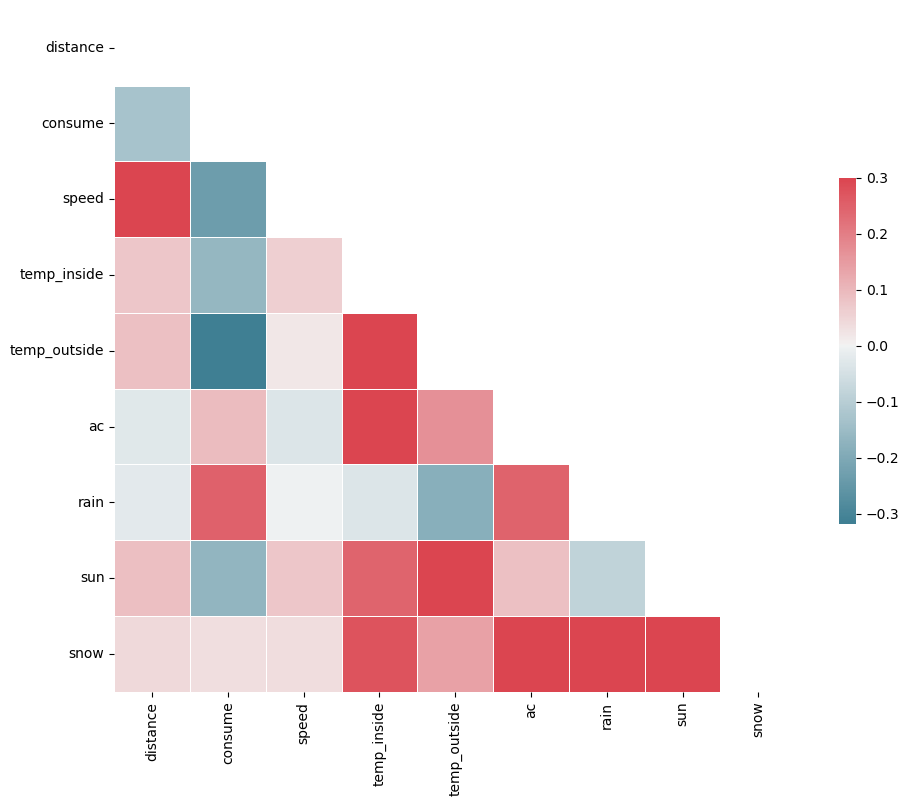

In [53]:
display_heatmap(cleaned_data.drop('gas_type', axis=1))